# EDA Assignment

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#load the application data
inp0 = pd.read_csv(r"C:\Users\sahas\Downloads\application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
# dropping missing values column
inp0 = inp0.drop(inp0.columns[inp0.apply(lambda x: (x.isnull().sum() / len(x)) > 0.4)], axis=1)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#dealing with missing values
inp0 =inp0[~(inp0['CODE_GENDER'] =='XNA')].copy()
inp0.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

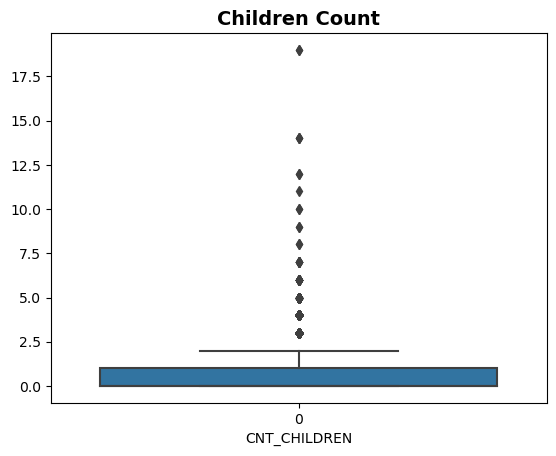

In [141]:
#identifying outliers in CNT_Children column
plt.title("Children Count", fontsize=14, fontweight='bold')
sns.boxplot(inp0.CNT_CHILDREN)
plt.xlabel('CNT_CHILDREN')
plt.show()

In [13]:
#handling missing values
inp0['CNT_FAM_MEMBERS'] = inp0['CNT_FAM_MEMBERS'].fillna(inp0['CNT_FAM_MEMBERS'].mode()[0])
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

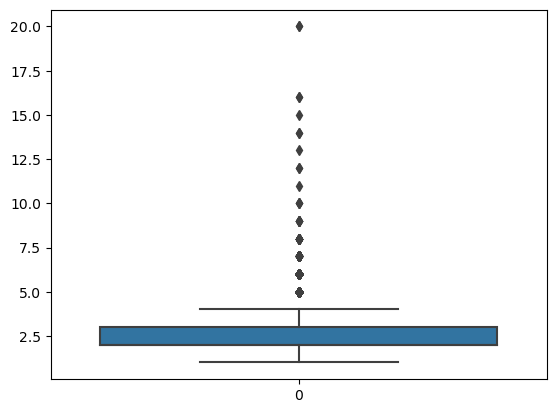

In [14]:
#identifying outliers
sns.boxplot(inp0.CNT_FAM_MEMBERS)
plt.show()

In [15]:
#exploring columns
inp0.ORGANIZATION_TYPE.isnull().sum()

0

In [18]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

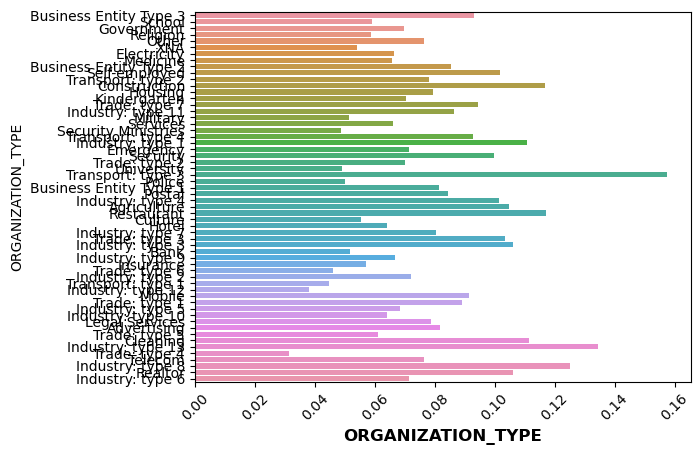

In [26]:
sns.barplot(y=inp0.ORGANIZATION_TYPE,x=(inp0.TARGET==1),ci=None)
plt.xlabel('ORGANIZATION_TYPE', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

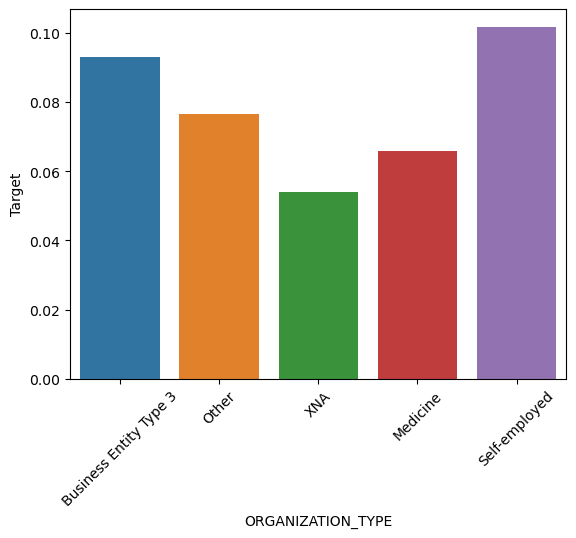

In [33]:
#doing bivariate analysis on Organization_Type Column
top_n = 5
top_categories = inp0.ORGANIZATION_TYPE.value_counts().nlargest(top_n).index

filtered_df = inp0[inp0.ORGANIZATION_TYPE.isin(top_categories)]

sns.barplot(x= 'ORGANIZATION_TYPE', y='TARGET', data=filtered_df,ci=None)
plt.xlabel('ORGANIZATION_TYPE')
plt.xticks(rotation=45)
plt.ylabel('Target')
plt.show()

In [35]:
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
#fixing the days columns
inp0['DAYS_BIRTH'] = inp0['DAYS_BIRTH'].abs() * 365
inp0.DAYS_BIRTH.describe()


count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [41]:
inp0['DAYS_EMPLOYED'] = inp0['DAYS_EMPLOYED'].abs() / 365
inp0['DAYS_REGISTRATION'] = inp0['DAYS_REGISTRATION'].abs() / 365
inp0['DAYS_ID_PUBLISH'] = inp0['DAYS_ID_PUBLISH'].abs() / 365

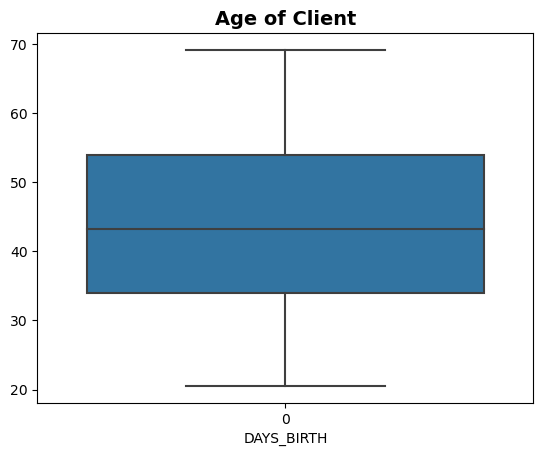

In [142]:
#doing univariate analysis on the 'DAYS_BIRTH' column
plt.title("Age of Client", fontsize=14, fontweight='bold')
sns.boxplot(inp0.DAYS_BIRTH)
plt.xlabel('DAYS_BIRTH')
plt.show()

In [47]:
#creating buckets for the AMT_INCOME_TOTAL column
inp0['income_range'] = pd.cut(inp0['AMT_INCOME_TOTAL'], bins=[0, 100000, 200000, 300000, 400000,float('inf')], labels=['<100k', '100-200k', '200-300k', '300-400k', '400k+'])
inp0.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200-300k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200-300k
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,<100k
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100-200k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100-200k


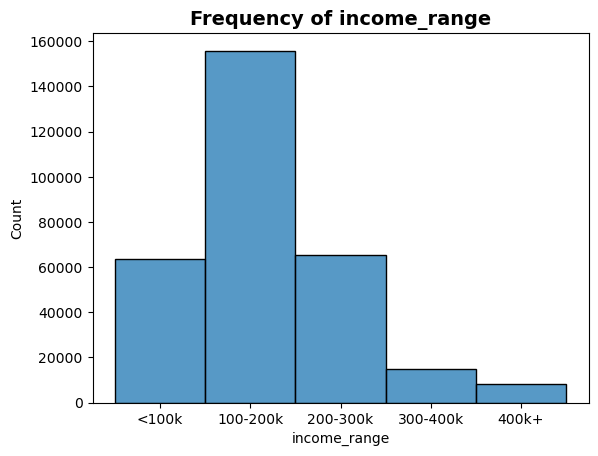

In [139]:
#doing univariate analysis on the income_range column 
plt.title("Frequency of income_range", fontsize=14, fontweight='bold')
sns.histplot(inp0.income_range)
plt.show()

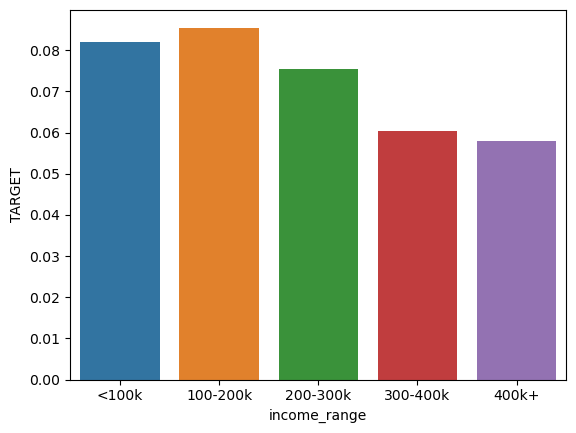

In [50]:
sns.barplot(x=inp0.income_range,y=inp0.TARGET,ci=None)
plt.show()

In [51]:
inp0['credit_range'] = pd.cut(inp0['AMT_CREDIT'], bins=[0, 1000000, 2000000, 3000000, 4000000,float('inf')], labels=['<1M', '1M-2M', '2M-3M', '3M-4M', '4M+'])
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_range,credit_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200-300k,<1M
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,200-300k,1M-2M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,<100k,<1M
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100-200k,<1M
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100-200k,<1M


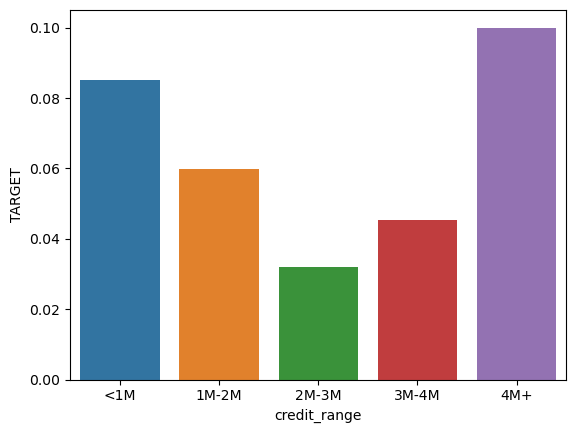

In [52]:
sns.barplot(x=inp0.credit_range,y=inp0.TARGET,ci=None)
plt.show()

In [53]:
inp0.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

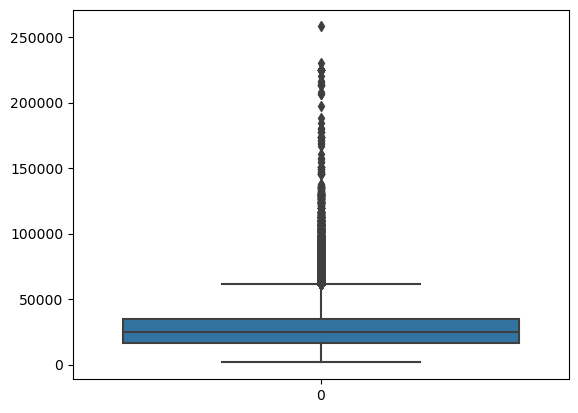

In [54]:
#univariate analysis on 'AMT_ANNUITY' column
sns.boxplot(inp0.AMT_ANNUITY)
plt.show()

In [62]:
inp0['annuity_range'] = pd.cut(inp0['AMT_ANNUITY'], bins=[0, 10000, 20000, 30000, 40000,float('inf')], labels=['<10k', '10k-20k', '20k-30k', '30k-40k', '40k+'])
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income_range,credit_range,annuity_range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,200-300k,<1M,20k-30k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,200-300k,1M-2M,30k-40k
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,<100k,<1M,<10k
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,100-200k,<1M,20k-30k
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,100-200k,<1M,20k-30k


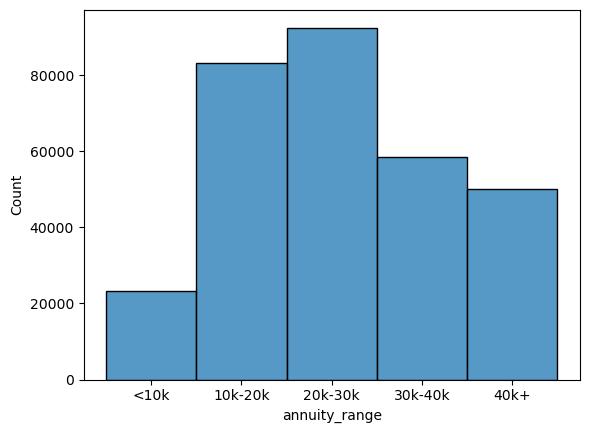

In [63]:
sns.histplot(inp0.annuity_range)
plt.show()

In [64]:
inp0.annuity_range.value_counts()

20k-30k    92464
10k-20k    83220
30k-40k    58562
40k+       49966
<10k       23283
Name: annuity_range, dtype: int64

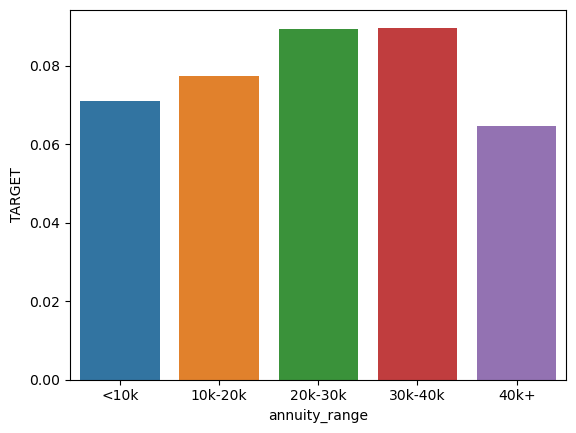

In [65]:
#bivariate analysis of annuity range with target column
sns.barplot(x=inp0.annuity_range,y=inp0.TARGET,ci=None)
plt.show()

In [67]:
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264362
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [68]:
#handling missing values
inp0['AMT_REQ_CREDIT_BUREAU_HOUR'] = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
inp0.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    305881
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

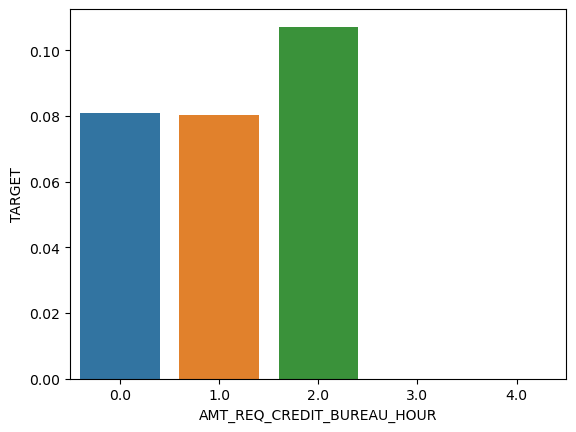

In [69]:
sns.barplot(x=inp0.AMT_REQ_CREDIT_BUREAU_HOUR,y=inp0.TARGET,ci=None)
plt.show()

In [71]:
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    264499
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [72]:
inp0['AMT_REQ_CREDIT_BUREAU_DAY'] = inp0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
inp0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    306018
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

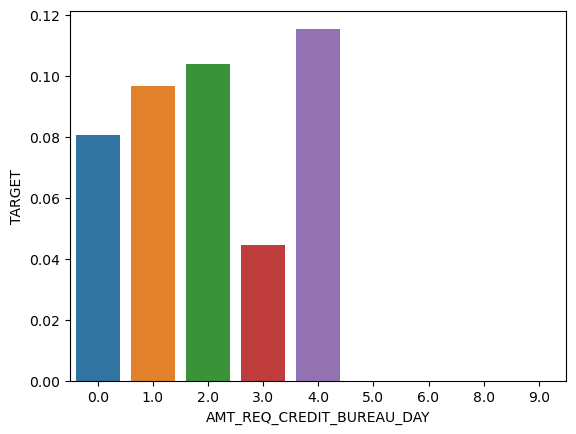

In [73]:
sns.barplot(x=inp0.AMT_REQ_CREDIT_BUREAU_DAY,y=inp0.TARGET,ci=None)
plt.show()

In [75]:
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257452
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [76]:
inp0['AMT_REQ_CREDIT_BUREAU_WEEK'] = inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
inp0.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    298971
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

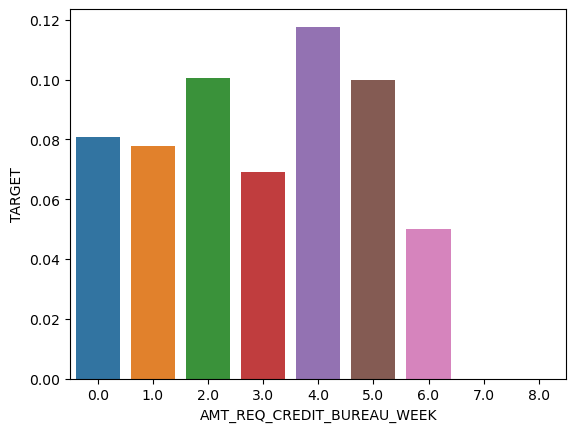

In [77]:
sns.barplot(x=inp0.AMT_REQ_CREDIT_BUREAU_WEEK,y=inp0.TARGET,ci=None)
plt.show()

In [81]:
inp0['AMT_REQ_CREDIT_BUREAU_MON'] = inp0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
inp0.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0     263749
1.0      33147
2.0       5386
3.0       1990
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

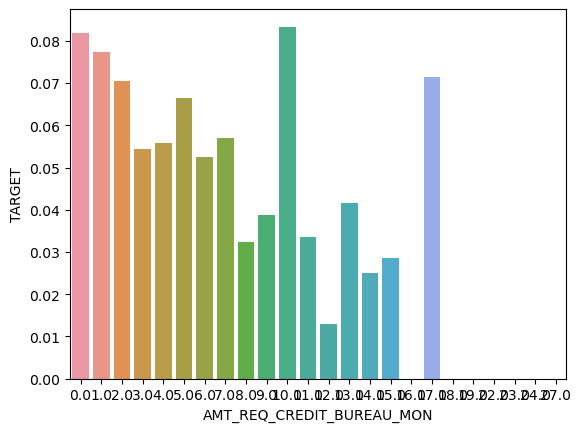

In [80]:
sns.barplot(x=inp0.AMT_REQ_CREDIT_BUREAU_MON,y=inp0.TARGET,ci=None)
plt.show()

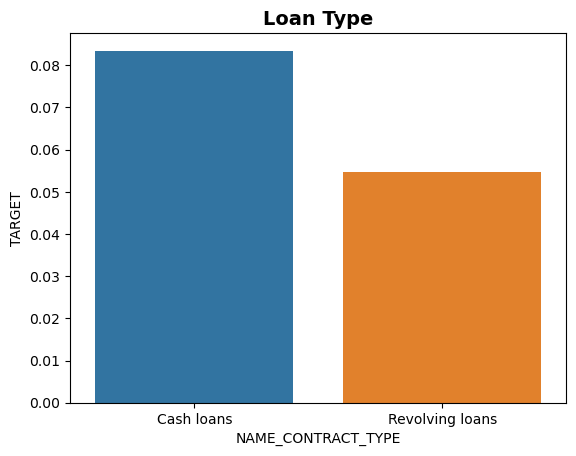

In [85]:
#doing bivariate anlysis with columns NAME_CONTRACT_TYPE & TARGET
plt.title("Loan Type", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_CONTRACT_TYPE,y=inp0.TARGET,ci=None)
plt.show()

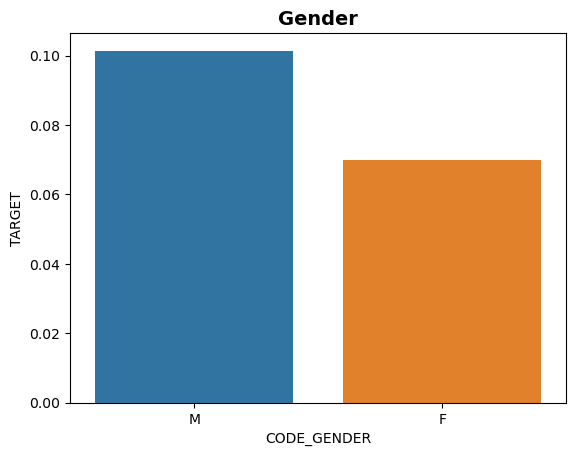

In [86]:
#bivariate analysis with CODE_GENDER vs TARGET columns
plt.title("Gender", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.CODE_GENDER,y=inp0.TARGET,ci=None)
plt.show()

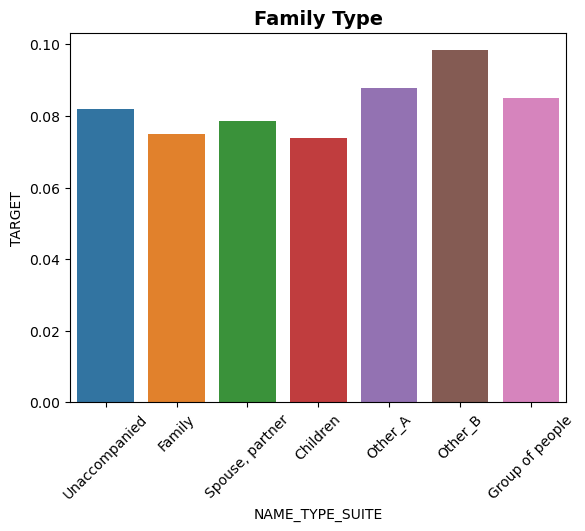

In [88]:
plt.title("Family Type", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_TYPE_SUITE,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

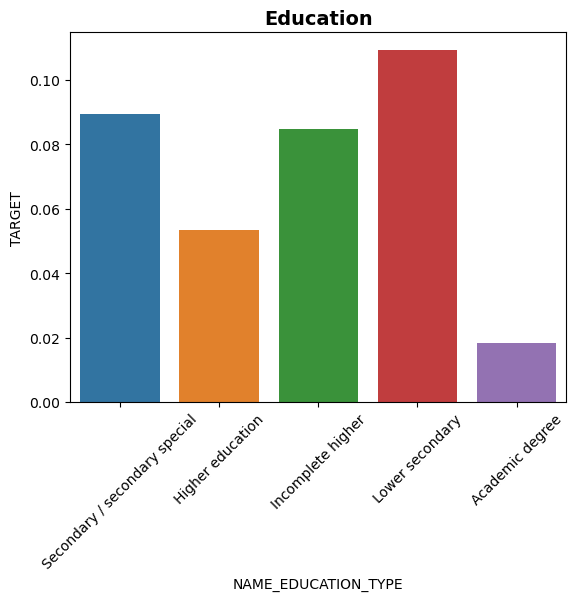

In [89]:
plt.title("Education", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_EDUCATION_TYPE,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

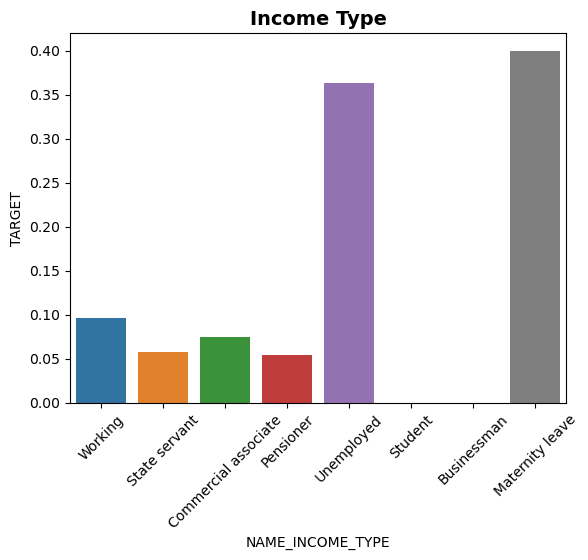

In [90]:
plt.title("Income Type", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_INCOME_TYPE,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

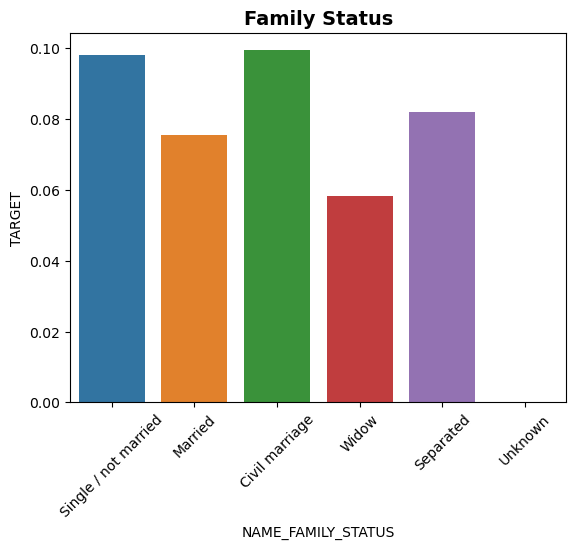

In [91]:
plt.title("Family Status", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_FAMILY_STATUS,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

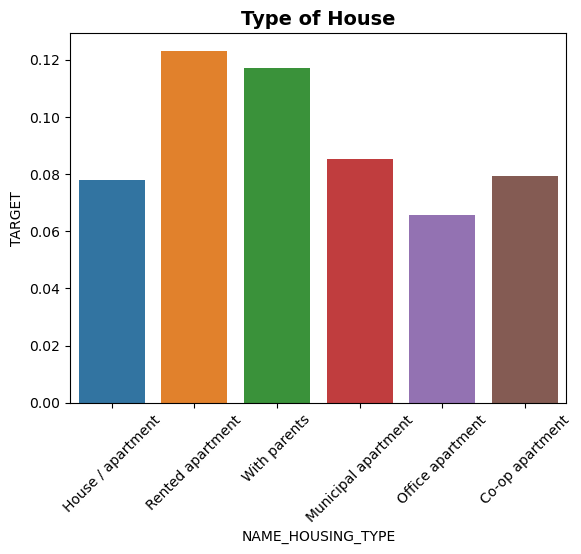

In [93]:
plt.title("Type of House", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.NAME_HOUSING_TYPE,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

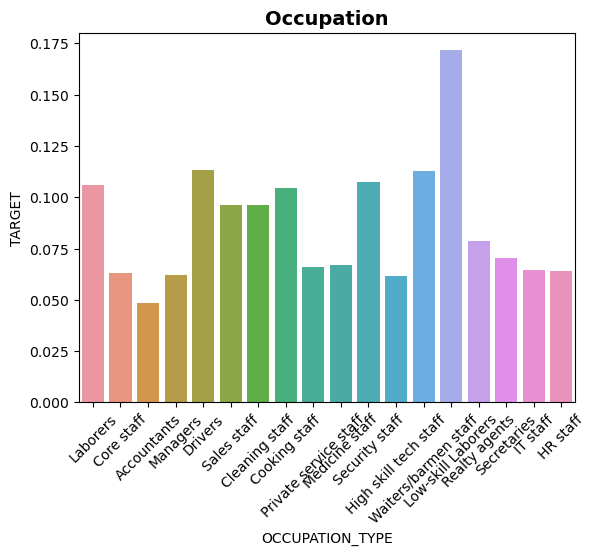

In [94]:
plt.title("Occupation", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.OCCUPATION_TYPE,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

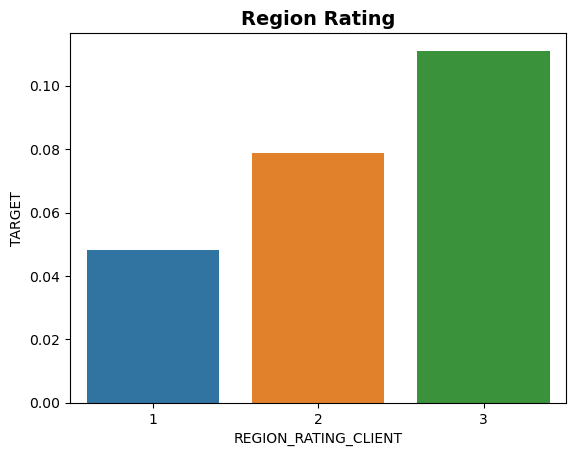

In [96]:
plt.title("Region Rating", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.REGION_RATING_CLIENT,y=inp0.TARGET,ci=None)

plt.show()

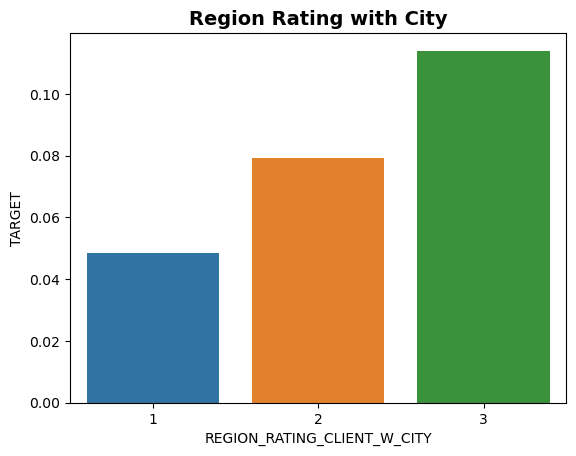

In [97]:
plt.title("Region Rating with City", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.REGION_RATING_CLIENT_W_CITY,y=inp0.TARGET,ci=None)

plt.show()

In [106]:
inp0.CNT_FAM_MEMBERS.value_counts()


2.0     158357
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

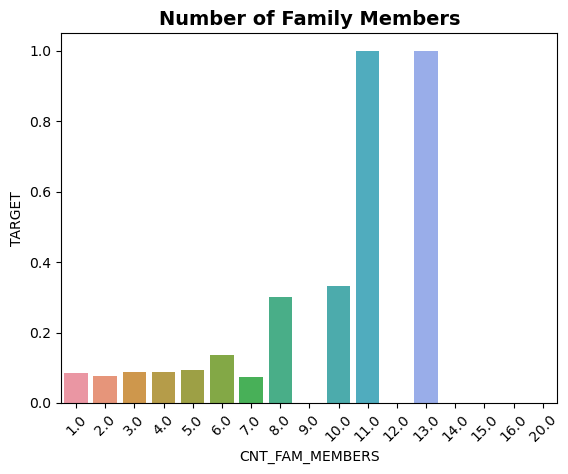

In [100]:
plt.title("Number of Family Members", fontsize=14, fontweight='bold')
sns.barplot(x=inp0.CNT_FAM_MEMBERS,y=inp0.TARGET,ci=None)
plt.xticks(rotation=45)
plt.show()

In [107]:
#load previous application data
inp1 = pd.read_csv(r"C:\Users\sahas\Downloads\previous_application.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# dropping missing values column
inp1 = inp1.drop(inp1.columns[inp1.apply(lambda x: (x.isnull().sum() / len(x)) > 0.4)], axis=1)
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [109]:
#exploring the NAME_CONTRACT_TYPE column
inp1.NAME_CONTRACT_TYPE.isnull().sum()

0

In [112]:
inp1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

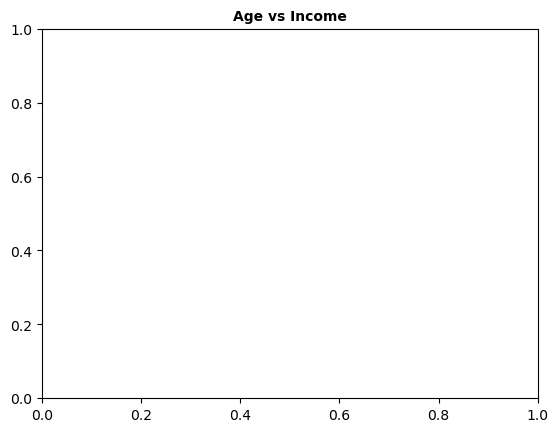

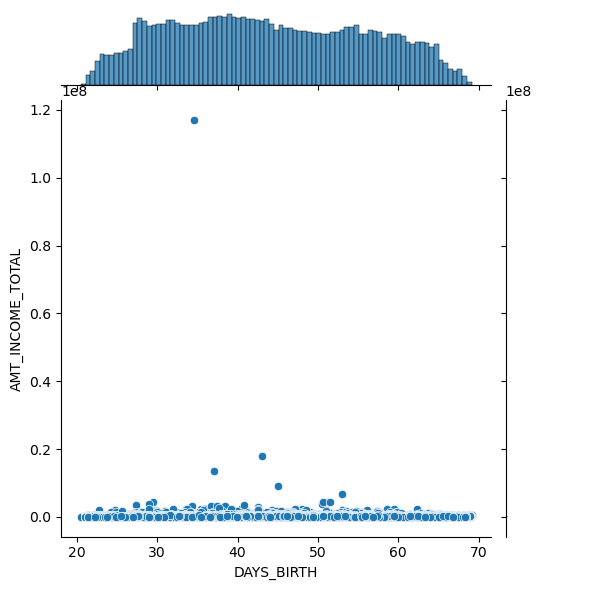

In [155]:
#Bivariate analysis between Age vs Income
plt.title("Age vs Income", fontsize=10, fontweight='bold')
sns.jointplot(x=inp0.DAYS_BIRTH,y=inp0.AMT_INCOME_TOTAL)
plt.show()

In [115]:
#fixing the NAME_CONTRACT_TYPE column
inp1.NAME_CONTRACT_TYPE = inp1.NAME_CONTRACT_TYPE.replace(['XNA'], inp1.NAME_CONTRACT_TYPE.mode()[0])
inp1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [116]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


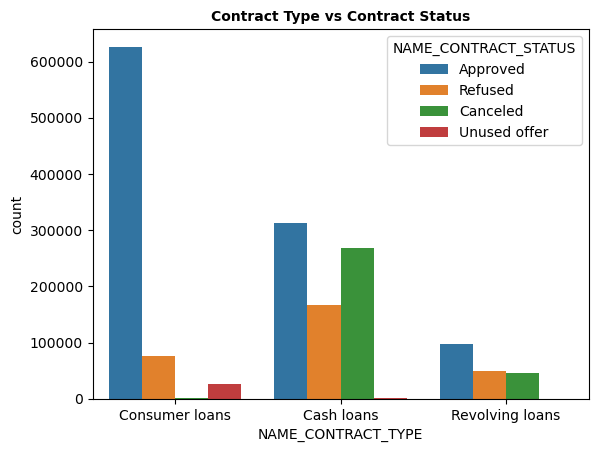

In [153]:
plt.title("Contract Type vs Contract Status", fontsize=10, fontweight='bold')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=inp1)
plt.show()

In [118]:
inp1.NAME_CLIENT_TYPE.isnull().sum()

0

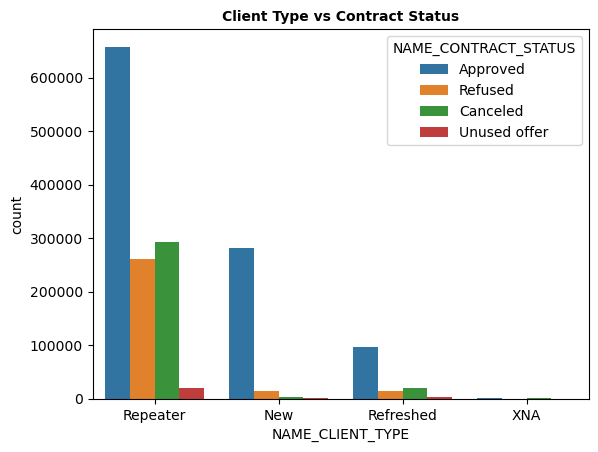

In [152]:
plt.title("Client Type vs Contract Status", fontsize=10, fontweight='bold')
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=inp1)
plt.show()

In [123]:
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [124]:
inp1.DAYS_DECISION = inp1.DAYS_DECISION.abs()

0

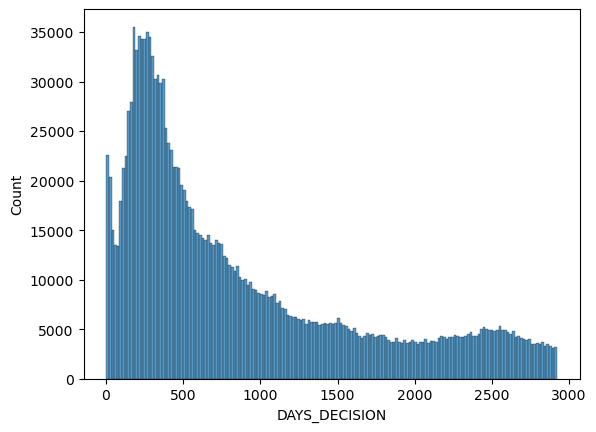

In [127]:
inp1.DAYS_DECISION = inp1.DAYS_DECISION.abs()
sns.histplot(inp1.DAYS_DECISION)
plt.show()

In [129]:
inp1.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [135]:
inp1['credit_range_previous'] = pd.cut(inp1['AMT_CREDIT'], bins=[0, 50000, 100000, 150000, 200000,250000,300000,float('inf')], labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k','250k-300k','300k+'])
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,credit_range,credit_range_previous
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,<50k,<50k
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,300k+,300k+
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,100k-150k,100k-150k
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,300k+,300k+
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,300k+,300k+


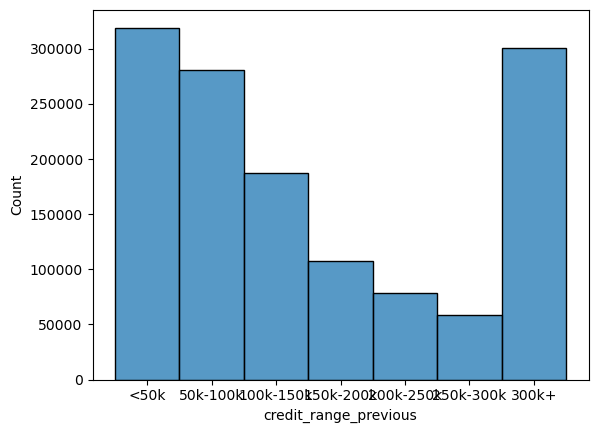

In [136]:
sns.histplot(inp1.credit_range_previous)
plt.show()

# Top 10 Correlations

In [137]:
#segmenting the dataset wrt TARGET variable
inp2 = inp0[inp0.TARGET == 1]
inp2.shape

(24825, 76)

In [138]:
#finding the top 10 correlations
correlations = inp2.corr().abs()

correlations = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))

top_correlations = correlations.unstack().sort_values(ascending=False).head(10)

top_correlations

FLAG_EMP_PHONE               DAYS_EMPLOYED                 0.999705
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998269
AMT_GOODS_PRICE              AMT_CREDIT                    0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.868994
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752699
AMT_ANNUITY                  AMT_CREDIT                    0.752195
dtype: float64

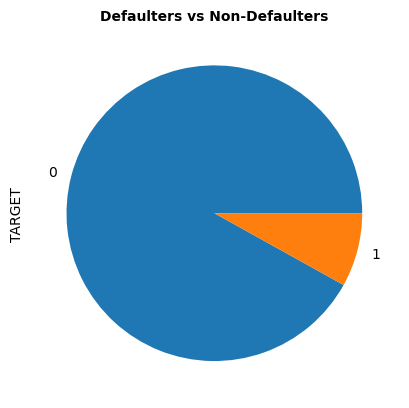

In [144]:
plt.title("Defaulters vs Non-Defaulters", fontsize=10, fontweight='bold')
inp0.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

In [145]:
inp3 = pd.merge(inp0, inp1, on='SK_ID_CURR', how='inner')
inp3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,credit_range_y,credit_range_previous
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,150k-200k,150k-200k
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,300k+,300k+
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,300k+,300k+
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,50k-100k,50k-100k
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,<50k,<50k


<Axes: xlabel='NAME_CONTRACT_STATUS'>

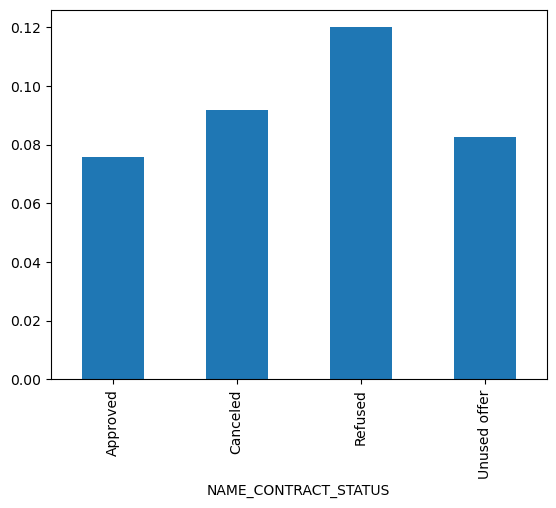

In [146]:
#trying to figure the percentage of people who got rejected previously have defaulted
inp3.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean().plot.bar()

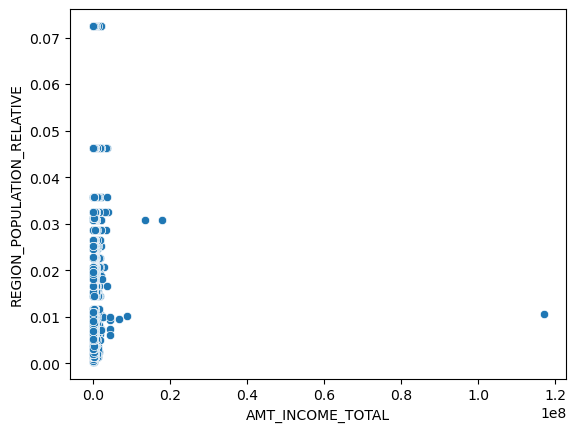

In [147]:
sns.scatterplot(y=inp0.REGION_POPULATION_RELATIVE,x=inp0.AMT_INCOME_TOTAL)
plt.show()

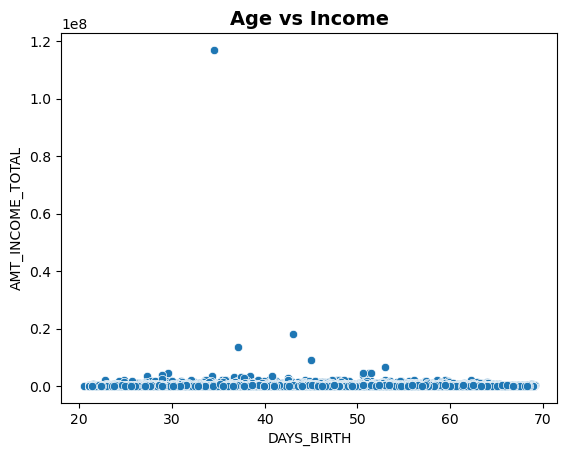

In [148]:
#bivariate analysis on age vs income
plt.title("Age vs Income", fontsize=14, fontweight='bold')
sns.scatterplot(x=inp0.DAYS_BIRTH,y=inp0.AMT_INCOME_TOTAL)
plt.show()

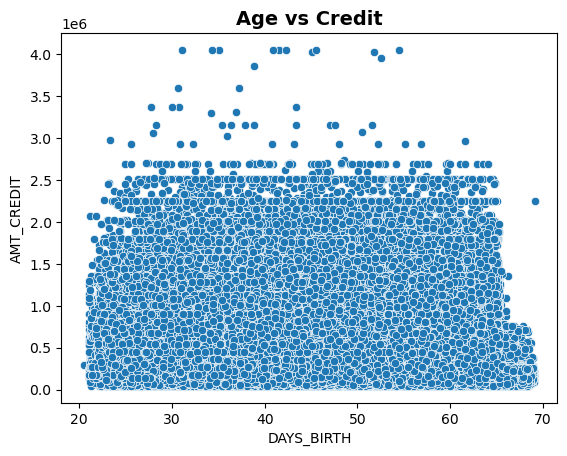

In [149]:
#bivariate analysis on age vs credit
plt.title("Age vs Credit", fontsize=14, fontweight='bold')
sns.scatterplot(x=inp0.DAYS_BIRTH,y=inp0.AMT_CREDIT)
plt.show()

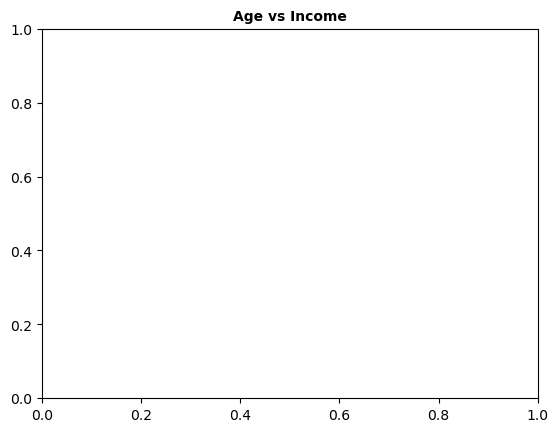

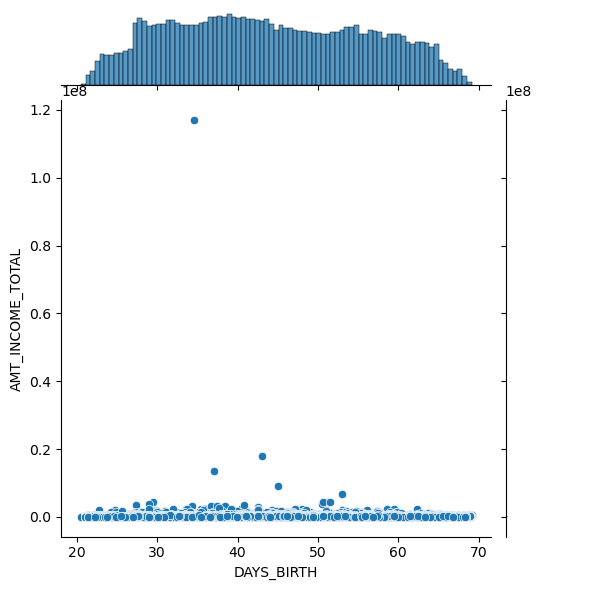

In [156]:
#Bivariate analysis between Age vs Income
plt.title("Age vs Income", fontsize=10, fontweight='bold')
sns.jointplot(x=inp0.DAYS_BIRTH,y=inp0.AMT_INCOME_TOTAL)
plt.show()

<Axes: xlabel='NAME_CLIENT_TYPE'>

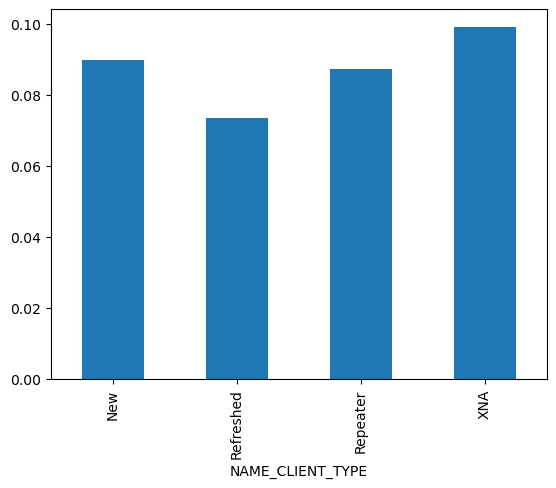

In [157]:
inp3.groupby(['NAME_CLIENT_TYPE'])['TARGET'].mean().plot.bar()

In [158]:
inp4 = inp0[inp0.TARGET == 0]
inp4.shape

(282682, 76)

In [159]:
#finding the top 10 correlations for Target =0
correlations1 = inp4.corr().abs()

correlations1 = correlations1.where(np.triu(np.ones(correlations.shape), k=1).astype(bool))

top_correlations1 = correlations1.unstack().sort_values(ascending=False).head(10)

top_correlations1

FLAG_EMP_PHONE               DAYS_EMPLOYED                 0.999756
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998508
AMT_GOODS_PRICE              AMT_CREDIT                    0.987253
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950148
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878569
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.859289
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776686
AMT_ANNUITY                  AMT_CREDIT                    0.771308
dtype: float64

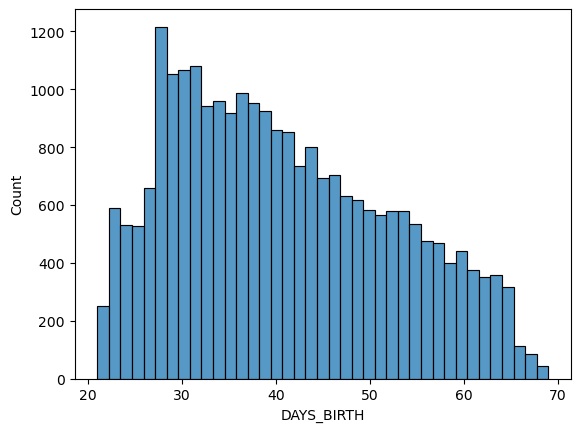

In [168]:
sns.histplot(inp2.DAYS_BIRTH)
plt.show()

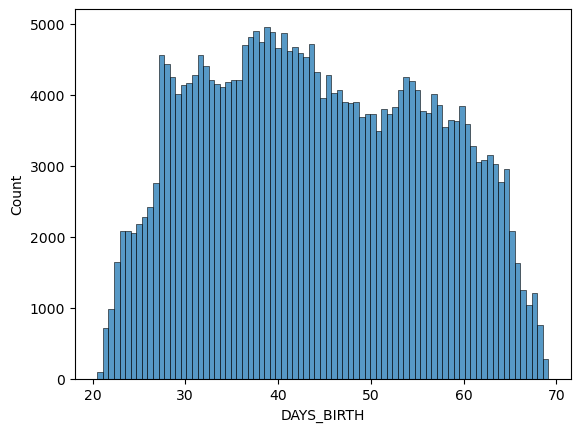

In [164]:
sns.histplot(inp4.DAYS_BIRTH)
plt.show()